# OpSim Basics Notebook
------
opsim : https://www.lsst.org/scientists/simulations/opsim

>The Operations Simulator (OpSim) is an application that simulates the field selection and image acquisition process of the LSST over the 10-year life of the planned survey. Each visit or image of a field in a particular filter is selected by combining science program requirements, the mechanics of the telescope design, and the modelled environmental conditions. The output of the simulator is a detailed record of the telescope movements and a complete description of the observing conditions as well as the characteristics of each image. OpSim is capable of balancing cadence goals from multiple science programs, and attempts to minimize time spent slewing as it carries out these goals. LSST operations can be simulated using realistic seeing distributions, historical weather data, scheduled engineering downtime and current telescope and camera parameters. 

>The Simulator has a sophisticated model of the telescope and dome to properly constrain potential observing cadences.  This model has also proven useful for investigating various engineering issues ranging from sizing of slew motors, to design of cryogen lines to the camera. The LSST Project developed the Operations Simulator to verify that the LSST Science Requirements could be met with the telescope design. It was used to demonstrated the capability of the LSST to deliver a 26,000 square degree survey probing the time domain and with 18,000 square degrees for the Wide-Fast-Deep survey to the design specifications of the Science Requirements Document, while effectively surveying for NEOs over the same area.  Currently, the Operations Simulation Team is investigating how to optimally observe the sky to obtain a single 10-year dataset that can be used to accomplish multiple science goals. 

------
# Outputs

|Column Name | Type  | Units    | Description                                                |
|------------|-------|-------   |------------------------------------------------------------|
|obsHistID   |integer|-         |Unique visit identifier (same as ObsHistory.obsHistID).     |
|sessionID   |integer|-         |Session identifier which is unique for simulated surveys created on a particular machine or hostname. Simulated surveys are uniquely named using the form hostname_sessionID.|
|propID      |integer|-         |Unique (on each machine) identifier for every proposal (observing mode) specified in a simulated survey. Note that a single visit can satisfy multiple proposals, and so duplicate rows (except for the propID) can exist in the Summary table (same as Proposal.propID).|
|fieldID     |integer|-          |Unique field (or target on the sky) identifier (same as Field.fieldID). OpSim uses a set of 5292 fields (targets) obtained from a fixed tessellation of the sky.|
|fieldRA     |real   |radians    |Right Ascension (J2000) of the field center for this visit (same as Field.fieldRA).|
|fieldDec    |real   |radians    |Declination (J2000) of the field center for this visit (same as Field.fieldDec).|
|filter      |text   |-          |Filter used during the visit; one of u, g, r, i, z, or y.|
|expDate     |integer|seconds    |Time of the visit relative to 0 sec at the start of a simulated survey.
|expMJD      |real   |days       |Modified Julian Date at the start of a visit.|
|night       |integer|none       |The integer number of nights since the start (expDate = 0 sec) of the survey. The first night is night = 0.
|visitTime   |real   |seconds    |Currently, a visit comprises two 15-second exposures and each exposure needs 1 sec for the shutter action and 2 sec for the CCD readout. The second readout is assumed to occur while moving to the next field (see slewTime), so the length of each visit for the WFD observing mode is 34 sec.
|visitExpTime|real   |seconds    |Total integration time on the sky during a visit, which for current observing modes is 30 sec (see visitTime).|
|finRank     |real   |-          |Target rank among all proposals including all priorities and penalties (generally used for diagnostic purposes).|
|FWHMgeom    |real   |arcseconds |"Geometrical" full-width at half maximum. The actual width at half the maximum brightness. Use FWHMgeom to represent the FWHM of a double-gaussian representing the physical width of a PSF.|
|FWHMeff     |real   |arcseconds |"Effective" full-width at half maximum, typically ~15% larger than FWHMgeom. Use FWHMeff to calculate SNR for point sources, using FWHMeff as the FWHM of a single gaussian describing the PSF.|
|transparency|real   |-          |The value (in 8ths) from the Cloud table closest in time to this visit.|
|airmass     |real   |-          |Airmass at the field center of the visit.
|vSkyBright  |real   |mag/arcsec2|The sky brightness in the Johnson V band calculated from a Krisciunas and Schaeffer model with a few modifications. This model uses the Moon phase, angular distance between the field and the Moon and the field’s airmass to calculate added brightness to the zero-Moon, zenith sky brightness (e.g. Krisciunas 1997, PASP, 209, 1181; Krisciunas and Schaefer 1991, PASP, 103, 1033; Benn and Ellison 1998, La Palma Technical Note 115).|
|filtSkyBrightness|real|mag/arcsec2|Measurements of the color of the sky as a function of lunar phase are used to correctvSkyBright to the sky brightness in the filter used during this visit.|
|rotSkyPos|real|radians|The orientation of the sky in the focal plane measured as the angle between North on the skyand the "up" direction in the focal plane.
|rotTelPos|real|radians|The physical angle of the rotator with respect to the mount. `rotSkyPos = rotTelPos - ParallacticAngle`|
|lst|real|radians|Local SiderealTime at the start of the visit.|
|altitude|real|radians|Altitude of the field center at the start of the visit.|
|azimuth|real|radians|Azimuth of the field center at the start of the visit.|
|dist2Moon|real|radians|Distance from the field center to the moon's center on the sky.|
|solarElong|real|degrees|Solar elongation or the angular distance between the field center and the sun (0 - 180 deg).|
|moonRA|real|radians|Right Ascension of the Moon.|
|moonDec|real|radians|Declination of the Moon.|
|moonAlt|real|radians|Altitude of the Moon taking into account the elevation of the site.|
|moonAZ|real|radians|Azimuth of the Moon|
|moonPhase|real|%|Percent illumination of the Moon (0=new, 100=full)|
|sunAlt|real|radians|Altitude of the Sun taking into account the elevation of the site, but with no correction for atmospheric refraction.|
|sunAz|real|radians|Azimuth of the Sun with no correction for atmospheric refraction.|
|phaseAngle|real|-|Intermediate values in the calculation of vSkyBright using the Krisciunas and Schaeffer models.|
|rScatter|real|-|" "|
|mieScatter|real|-|" "|
|moonBright|real|-|" "|
|darkBright|real|-|" "|
|rawSeeing|real|arcseconds|The seeing as taken from the Seeing table which is an ideal seeing at zenith and at 500 nm.|
|wind|real|-|A placeholder for real telemetry.|
|humidity|real|-|A placeholder for real telemetry.|
|slewDist|real|radians|Distance on the sky between the target field center and the field center of the previous visit.|
|slewTime|real|seconds|The time between the end of the second exposure in the previous visit and the beginning of the first exposure in the current visit.|
|fiveSigmaDepth|real|magnitudes|The magnitude of a point source that would be a 5-sigma detection (see Z. Ivezic et al, http://arxiv.org/pdf/0805.2366.pdf (link is external)).|
|ditheredRA|real|radians|The offset from the Right Ascension of the field center representing a "hex-dithered" pattern.|
|ditheredDec|real|radians|The offset from the Declination of the field center representing a "hex-dithered" pattern.|

------

In [2]:
from __future__ import print_function ## Force python3-like printing
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

import lsst_tools.utils as utils
from lsst_tools.utils import colours as c


In [3]:
import sqlite3
from sqlalchemy import create_engine

In [4]:
opsimdbpath = os.environ.get('OPSIMDBPATH')

print(opsimdbpath)

/Users/berto/data/LSST/OpSimOutputDBs/minion_1016_sqlite.db


In [5]:
then = time.time()

In [6]:
engine = create_engine('sqlite:///' + opsimdbpath)

In [7]:
conn = sqlite3.connect(opsimdbpath)

In [8]:
cursor = conn.cursor()

In [9]:
query = 'SELECT COUNT(*) FROM Summary'
cursor.execute(query)

In [10]:
cursor.fetchall()

[(2448282,)]

In [11]:
# opsimdf = pd.read_sql_query('SELECT * FROM Summary WHERE night < 1000', engine)
## Look at the first year - to get a feel
# opsimdf = pd.read_sql_query('SELECT * FROM Summary WHERE night < 366', engine)
## Just one night
opsimdf = pd.read_sql_query('SELECT * FROM Summary WHERE night = 1000', engine)
now = time.time()
print (now - then)

7.682047128677368


In [12]:
opsimdf.head()

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,moonBright,darkBright,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec
0,672826,1016,54,2165,5.796281,-0.181195,y,86398423,60579.981754,1000,...,0.0,102.684157,0.906689,0.0,0.0,0.516984,0.000000,21.069819,5.825392,-0.177889
1,672827,1016,54,2153,5.851738,-0.187126,y,86398462,60579.982202,1000,...,0.0,105.831971,0.906689,0.0,0.0,0.054850,4.677097,21.031405,5.880881,-0.183820
2,672828,1016,54,2045,5.825106,-0.228028,y,86398500,60579.982650,1000,...,0.0,102.332347,0.906689,0.0,0.0,0.048498,4.685156,21.074114,5.854501,-0.224722
3,672829,1016,54,1931,5.798075,-0.268607,y,86398539,60579.983097,1000,...,0.0,99.225171,0.906689,0.0,0.0,0.048306,4.672377,21.112093,5.827774,-0.265301
4,672830,1016,54,1842,5.770527,-0.308861,y,86398578,60579.983545,1000,...,0.0,96.469428,0.906689,0.0,0.0,0.048138,4.658027,21.145880,5.800583,-0.305555


In [13]:
# Definitions of the columns are 
opsimdf[['obsHistID', 'filter', 'night', 'expMJD',
         'fieldID', 'fieldRA', 'ditheredRA', 'ditheredRA', 'ditheredDec',
         'propID', 'fiveSigmaDepth']].head()

,obsHistID,filter,night,expMJD,fieldID,fieldRA,ditheredRA,ditheredRA,ditheredDec,propID,fiveSigmaDepth
0,672826,y,1000,60579.981754,2165,5.796281,5.825392,5.825392,-0.177889,54,21.069819
1,672827,y,1000,60579.982202,2153,5.851738,5.880881,5.880881,-0.183820,54,21.031405
2,672828,y,1000,60579.982650,2045,5.825106,5.854501,5.854501,-0.224722,54,21.074114
3,672829,y,1000,60579.983097,1931,5.798075,5.827774,5.827774,-0.265301,54,21.112093
4,672830,y,1000,60579.983545,1842,5.770527,5.800583,5.800583,-0.305555,54,21.145880


In [14]:
opsimdf.propID.unique()

array([54, 56, 55])

In [15]:
ddf = opsimdf.query('propID == 56') ## 56 is DDF
print(len(ddf))

288


In [16]:
filters = np.unique(ddf["filter"])
print(filters)

['g' 'i' 'r' 'y' 'z']


## Looking at outputs
------
The Raw Seeing is the ideal seeing at zenith

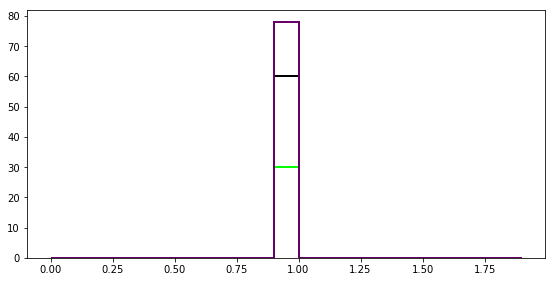

In [18]:
fig = plt.figure(figsize=[8, 4])
fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
                    right = 0.99, hspace=0, wspace = 0)

ax1 = fig.add_subplot(111)

histstruct = {}

bins = np.arange(0, 2.0, 0.1)
for i, f in enumerate(filters):
    seeing_dist = ddf.query("filter == u'" + f + "'")["rawSeeing"]
    histstruct[f] = ax1.hist(seeing_dist, color = c.hex["LSST_"+f], histtype = "step",
                            lw = 2, bins = bins)


A better value to use is `FWHMeff`

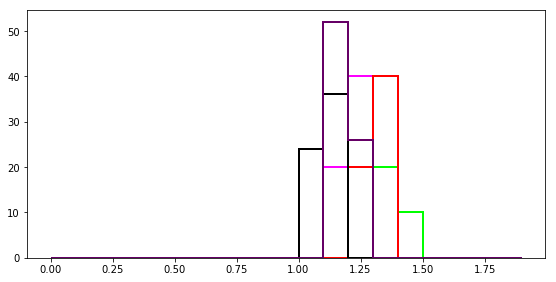

In [20]:
fig = plt.figure(figsize=[8, 4])
fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
                    right = 0.99, hspace=0, wspace = 0)

ax1 = fig.add_subplot(111)

histstruct = {}

bins = np.arange(0, 2.0, 0.1)
for i, f in enumerate(filters):
    seeing_dist = ddf.query("filter == u'" + f + "'")["FWHMeff"]
    histstruct[f] = ax1.hist(seeing_dist, color = c.hex["LSST_"+f], histtype = "step",
                            lw = 2, bins = bins)

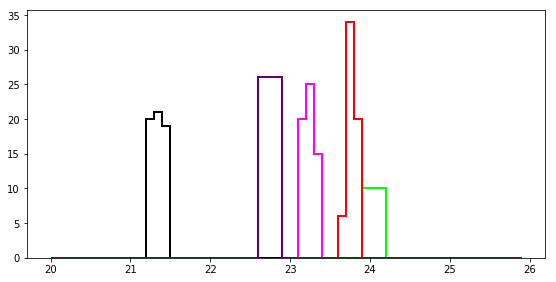

In [21]:
fig = plt.figure(figsize=[8, 4])
fig.subplots_adjust(left = 0.09, bottom = 0.13, top = 0.99,
                    right = 0.99, hspace=0, wspace = 0)

ax1 = fig.add_subplot(111)

histstruct = {}
bins = np.arange(20, 26, 0.1)

for i, f in enumerate(filters):
    depth_dist = ddf.query("filter == u'" + f + "'")["fiveSigmaDepth"]
    histstruct[f] = ax1.hist(depth_dist, color = c.hex["LSST_"+f], histtype = "step",
                            lw = 2, bins= bins)

In [22]:
for i, f in enumerate(filters):
    print(i, f, len(ddf.query("filter == u'" + f + "'")))

0 g 30
1 i 60
2 r 60
3 y 60
4 z 78


In [23]:
xx = opsimdf.query('fieldID == 316')

In [24]:
xx.head()

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,moonBright,darkBright,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec


## Some unexpected issues

In [25]:
xx.query('propID == 54')

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,moonBright,darkBright,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec


## How to read the table:

- obsHistID indexes a pointing ('fieldRA', 'fieldDec', 'ditheredRA', 'ditheredDec')
- Additionally a pointing may be assigned a propID to describe what a pointing achieves
- The meaning of the propID is given in the Proposal Table. For minion_1016_sqlite.db, the WFD is 54, and the DDF is 56, but this coding might change.
- If a pointing achieves the task of succeeding in two different proposals, this is represented by haveing two records with the same pointng and different `propID`

In [26]:
test = opsimdf.drop_duplicates()

In [27]:
all(test == opsimdf)

True

In [28]:
test = opsimdf.drop_duplicates(subset='obsHistID')

In [29]:
len(test) == len(opsimdf)

False

In [30]:
opsimdf.obsHistID.size

889

In [31]:
opsimdf.obsHistID.unique().size

888

In [32]:
test.obsHistID.size

888

In [33]:
ddf

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,moonBright,darkBright,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec
50,672876,1016,56,290,6.097944,-1.105160,r,86400473,60580.005485,1000,...,0.0,105.218363,0.906689,0.0,0.0,0.781556,120.0,23.687330,6.161718,-1.101854
51,672877,1016,56,290,6.097944,-1.105160,r,86400510,60580.005913,1000,...,0.0,104.845142,0.906689,0.0,0.0,0.000000,3.0,23.693281,6.161718,-1.101854
52,672878,1016,56,290,6.097944,-1.105160,r,86400547,60580.006341,1000,...,0.0,104.756314,0.906689,0.0,0.0,0.000000,3.0,23.694698,6.161718,-1.101854
53,672879,1016,56,290,6.097944,-1.105160,r,86400584,60580.006770,1000,...,0.0,104.667811,0.906689,0.0,0.0,0.000000,3.0,23.696110,6.161718,-1.101854
54,672880,1016,56,290,6.097944,-1.105160,r,86400621,60580.007198,1000,...,0.0,104.579632,0.906689,0.0,0.0,0.000000,3.0,23.697517,6.161718,-1.101854
55,672881,1016,56,290,6.097944,-1.105160,r,86400658,60580.007626,1000,...,0.0,104.491778,0.906689,0.0,0.0,0.000000,3.0,23.698921,6.161718,-1.101854
56,672882,1016,56,290,6.097944,-1.105160,r,86400694,60580.008043,1000,...,0.0,104.404247,0.906689,0.0,0.0,0.000000,2.0,23.700319,6.161718,-1.101854
57,672883,1016,56,290,6.097944,-1.105160,r,86400731,60580.008471,1000,...,0.0,104.319392,0.906689,0.0,0.0,0.000000,3.0,23.701675,6.161718,-1.101854
58,672884,1016,56,290,6.097944,-1.105160,r,86400768,60580.008899,1000,...,0.0,104.232499,0.906689,0.0,0.0,0.000000,3.0,23.703063,6.161718,-1.101854
59,672885,1016,56,290,6.097944,-1.105160,r,86400805,60580.009328,1000,...,0.0,104.145928,0.906689,0.0,0.0,0.000000,3.0,23.704448,6.161718,-1.101854
